<p style="text-align:center;">
<img src="Swan Teleco Logo.png" alt="logo" />
</p>

# Swan Consulting
## Customer Churn Rate
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; By Get Dummies Analytics
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Sarah Jennings, Elif Varli & Dewi Rhys Chappel

 # EDA

## 1. Import the Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier as RF

import statsmodels.api as sm
import statsmodels.tools

## 2. Import the Data

In [2]:
path = "1 - Project Data.xlsx"  # The path to the file 
full_df = pd.read_excel(path)
df = full_df.copy()

## 3. Describing the Data

### Showing All Lines

In [3]:
pd.set_option('display.max_columns', None) # Displaying all columns
df.head() # Seeing the top 5 rows of the dataframe

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


### Exploring Shape & Nulls

In [4]:
## Checking the shape of the database
df.shape

(7043, 31)

In [5]:
# Showing the non-null counts and the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### Checking Unique Values

In [6]:
# Counting the number of unique values in each column
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Reason           20
dtype: int64

#### Listing all the unique values for a given column

In [7]:
df['Country'].unique()

array(['United States'], dtype=object)

In [8]:
df['State'].unique()

array(['California'], dtype=object)

In [9]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [10]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
df['Multiple Lines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [12]:
df['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [13]:
df['Device Protection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Similar for: \
Multiple Lines \
Internet Service \
Online Security \
Online Backup \
Device Protection \
Tech Support \
Streaming TV \
Streaming Movies \
Contract

In [14]:
df['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [15]:
df['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [16]:
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

### Checking Consistency

#### Checking 'Churn Label' and 'Churn Value' are consistent

In [17]:
df['CustomerID'][df['Churn Label'] == df['Churn Value'].map({0:'No', 1:'Yes'})].count()

7043

#### Checking 'Churn Reason' only null when 'Churn Value' is 0

In [18]:
df['CustomerID'][((df['Churn Reason'] != df['Churn Reason']) & (df['Churn Value'] == 0))|((df['Churn Reason'] == df['Churn Reason']) & (df['Churn Value'] == 1))].count()

7043

#### Checking 'No Internet' Consistency

In [19]:
df[df['Internet Service'] == 'No'].nunique()

CustomerID           1526
Count                   1
Country                 1
State                   1
City                  762
Zip Code             1076
Lat Long             1076
Latitude             1076
Longitude            1076
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           1
Multiple Lines          2
Internet Service        1
Online Security         1
Online Backup           1
Device Protection       1
Tech Support            1
Streaming TV            1
Streaming Movies        1
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges       123
Total Charges        1382
Churn Label             2
Churn Value             2
Churn Reason           18
dtype: int64

Since various columns have one unique value when "Internet Service" is "No", these unique values can be checked by selecting an example row.

In [20]:
df[df['Internet Service'] == 'No'].head(1)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,Competitor made better offer


What we were trying to check here is that "No internet service" is only on rows where "Internet Service" is "No".  
The following shows that customers with internet service only have the options "Yes" or "No".

In [21]:
df[df['Internet Service'] != 'No'].nunique()

CustomerID           5517
Count                   1
Country                 1
State                   1
City                 1127
Zip Code             1649
Lat Long             1649
Latitude             1649
Longitude            1648
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        2
Online Security         2
Online Backup           2
Device Protection       2
Tech Support            2
Streaming TV            2
Streaming Movies        2
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1494
Total Charges        5259
Churn Label             2
Churn Value             2
Churn Reason           20
dtype: int64

# Feature Engineering

In [22]:
# Selecting the features
# Removing the features that uniquely identify customers or are redundant
feature = list(df.columns)
feature.remove('CustomerID')
feature.remove('Count')
feature.remove('Country')
feature.remove('State')
feature.remove('Lat Long')
feature.remove('Churn Label')
feature.remove('Churn Reason')

In [23]:
# Restricting the dataframe to these features
df = df[feature].copy()

# Applying One Hot Encoding on the following columns : 'Internet Service','Contract','Payment Method'
df = pd.get_dummies(data = df, columns = ['Internet Service'], prefix='Service')
df = pd.get_dummies(data = df, columns = ['Contract'], prefix='Contract')
df = pd.get_dummies(data = df, columns = ['Payment Method'], prefix='Method')

In [24]:
# Converting 'Total Charges' column to float
df['Total Charges'].replace({' ':0},inplace = True)
df['Total Charges'].astype('float')

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64

In [25]:
# Creating a mapping function to convert columns into boolean values
def mapping_func(df):
    col_names = ['Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies','Paperless Billing','Gender','Phone Service', 'Multiple Lines','Senior Citizen','Partner','Dependents','Online Security'] 
    
    for i in col_names:
        df[i] = df[i].map({"No":0, "Yes":1, 'No internet service':0, 'No phone service':0,'Male':0,'Female':1})
        df[i] = df[i].astype('float')
    return df

In [26]:
# Calling the mapping function on the dataframe
df = mapping_func(df)

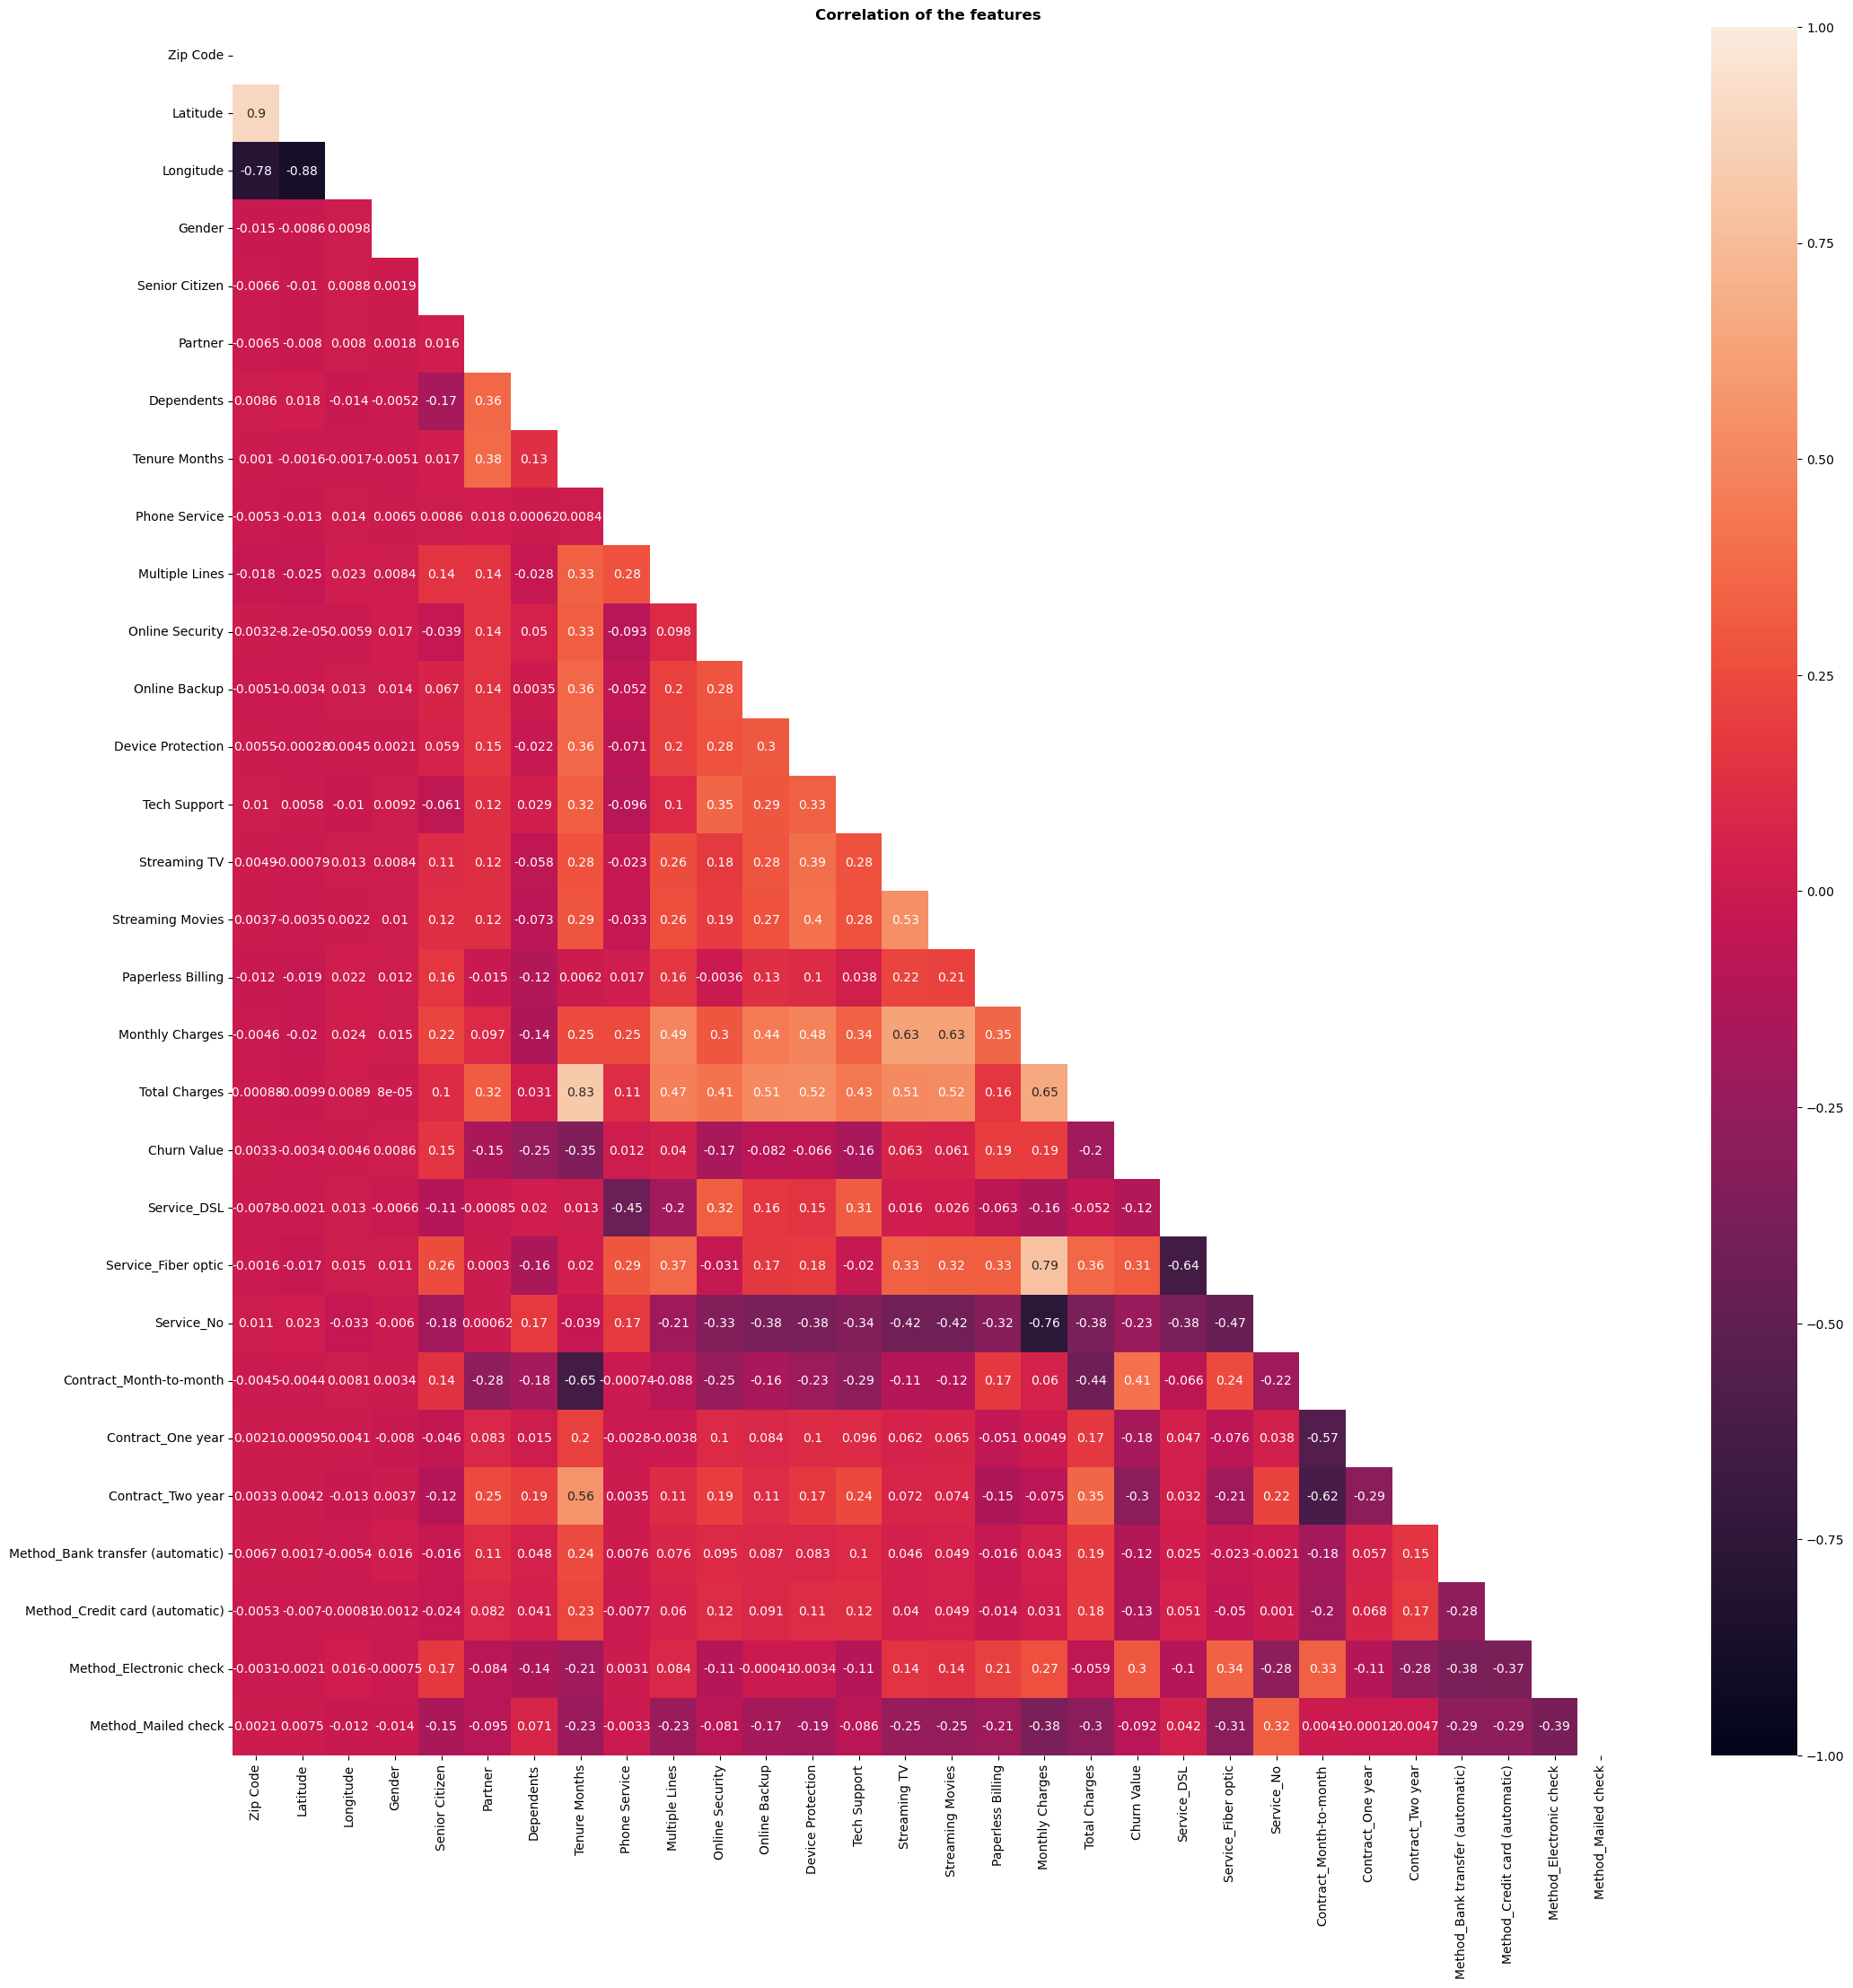

In [27]:
# Observing the full correalation heatmap
plt.figure(figsize = (25, 25))
sns.heatmap(df.corr(numeric_only=True), 
            annot = True, 
            fmt = '.2', 
            cmap='rocket',
            mask = np.triu(df.corr(numeric_only=True)), 
            vmin=-1,
            vmax=1)

plt.title("Correlation of the features", weight='bold')
plt.show()

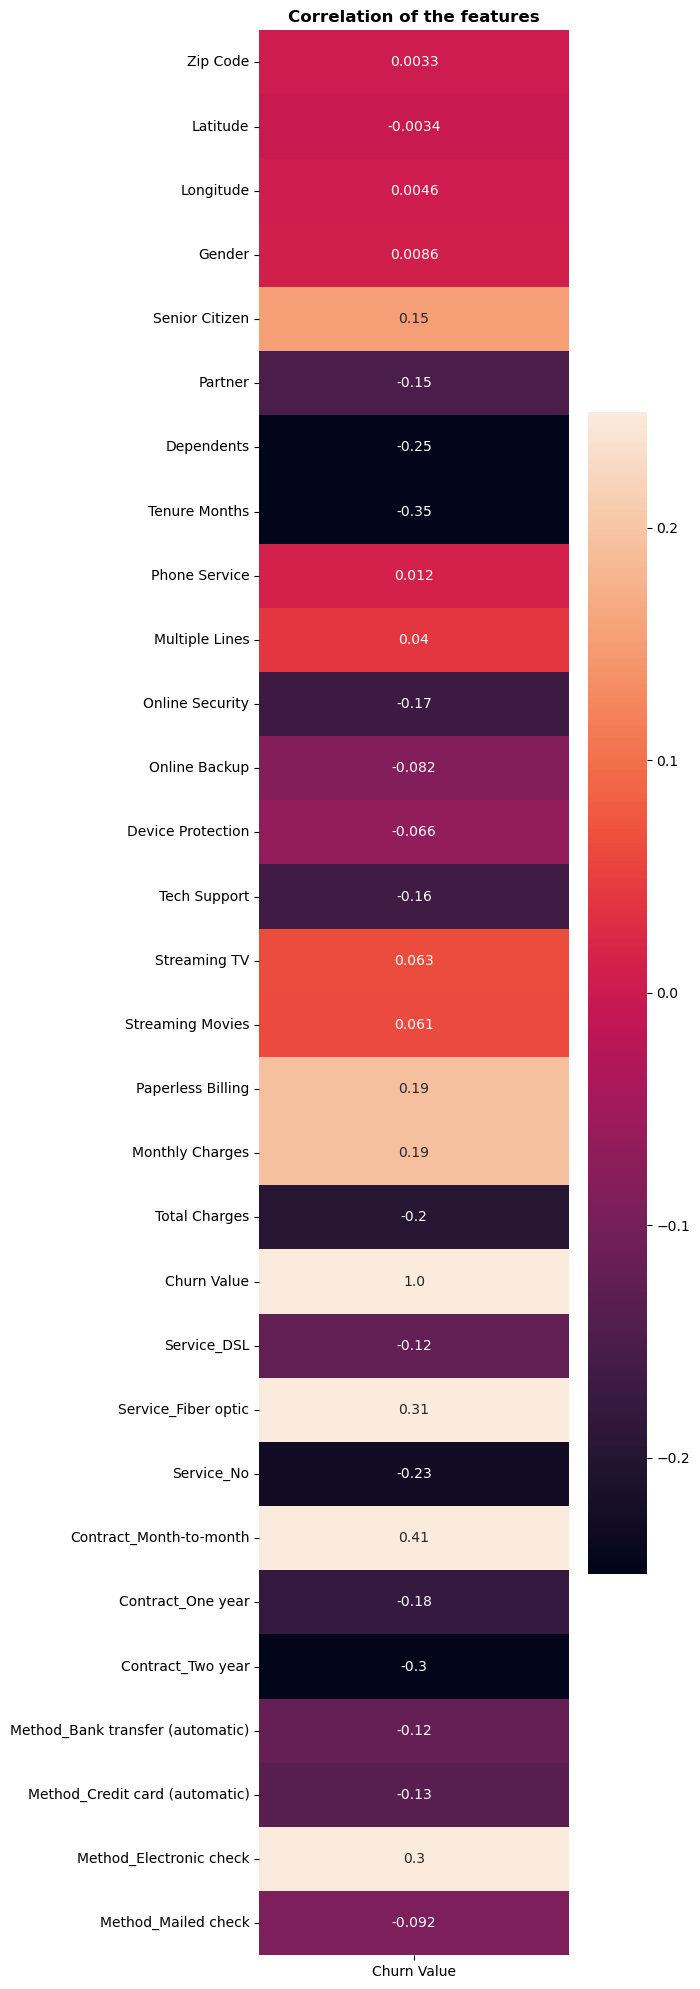

In [28]:
# Observing a correlation heatmap of all numerical values against "Churn Value"
plt.figure(figsize = (5, 25))

sns.heatmap(df.corr(numeric_only=True)[['Churn Value']],
            annot = True, 
            fmt = '.2', 
            cmap='rocket',
           vmin = -0.25,
           vmax = 0.25)

plt.title("Correlation of the features", weight='bold')
plt.show()

In [29]:
# Checking that all columns have been converted into useable types i.e. numerical 
df.dtypes

City                                 object
Zip Code                              int64
Latitude                            float64
Longitude                           float64
Gender                              float64
Senior Citizen                      float64
Partner                             float64
Dependents                          float64
Tenure Months                         int64
Phone Service                       float64
Multiple Lines                      float64
Online Security                     float64
Online Backup                       float64
Device Protection                   float64
Tech Support                        float64
Streaming TV                        float64
Streaming Movies                    float64
Paperless Billing                   float64
Monthly Charges                     float64
Total Charges                       float64
Churn Value                           int64
Service_DSL                            bool
Service_Fiber optic             

# Model Selection & Testing

#### Train Test Split

In [30]:
# Selecting features to use in the model
Features = list(df.columns)

# Removing 'Churn Value' column due to it being the target, and 'City' column because it's categorical and each category does not have enough data
Features.remove('Churn Value')
Features.remove('City')

In [31]:
# Assigning the features and target
X = df[Features]
y = df['Churn Value']

# Splitting the features and target into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
# Building a function that creates a confusion matrix and gives the accuracy, recall, precision and F1-score of the model
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

#### Fitting Logistic Model

In [33]:
# Creating the logistic regression object
lr = LogisticRegression(max_iter=300, random_state=10)

In [34]:
# Fitting the model to the train data
lr.fit(X_train, y_train)

LogisticRegression(max_iter=300, random_state=10)

In [35]:
# Predicting the training target using the train data
log_model = lr.predict_proba(X_train)

In [36]:
# Creating a cut-off point
y_pred = np.where(log_model[:,1]>.5, 1, 0)

In [37]:
# Checking how well the prediction matches the result with the function created previously
get_results(y_train, y_pred)

The confusion matrix for your predictions is:
[[3786  379]
 [ 821  648]] 

The accuracy of your model is: 0.7870074547390842
The recall of your model is: 0.4411164057181756
The precision of your model is: 0.6309639727361246
The F1-score of your model is: 0.5192307692307692


In [38]:
# Evaluating the model using the test data
log_model = lr.predict_proba(X_test)
y_pred = np.where(log_model[:,1]>.5, 1, 0)
get_results(y_test, y_pred)

The confusion matrix for your predictions is:
[[907 102]
 [214 186]] 

The accuracy of your model is: 0.7757274662881476
The recall of your model is: 0.465
The precision of your model is: 0.6458333333333334
The F1-score of your model is: 0.5406976744186047


In [39]:
# Creating an ordered list of customers and their likelihood to leave using this model
X_new = full_df.copy()
log_model = lr.predict_proba(X)
X_new['y_pred'] = log_model[:,1]
X_staying = X_new[X_new['Churn Value'] == 0]
X_log_likely_leave = X_staying[['CustomerID','y_pred']].sort_values('y_pred', ascending = False).reset_index()
X_log_likely_leave = X_log_likely_leave[['CustomerID','y_pred']]
X_log_likely_leave.head(500)

,CustomerID,y_pred
0,2081-VEYEH,0.873612
1,5760-IFJOZ,0.864469
2,6734-GMPVK,0.832127
3,7379-FNIUJ,0.819999
4,4929-XIHVW,0.815989
...,...,...
495,8990-ZXLSU,0.494536
496,7989-VCQOH,0.494431
497,1194-HVAIF,0.493753
498,0550-DCXLH,0.493328


#### Decision Tree Random Forest

In [40]:
# Creating a random decision forest object
clf = RF(criterion = 'entropy',
         max_depth = 1000,
         n_estimators = 1000,
         min_samples_leaf = 10)

# Fitting the model to the train data
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=10,
                       n_estimators=1000)

In [41]:
# Predicting using the train data
y_pred = clf.predict(X_train)

# Evaluating the model using train data
get_results(y_train, y_pred)

The confusion matrix for your predictions is:
[[3938  227]
 [ 566  903]] 

The accuracy of your model is: 0.8592474263400781
The recall of your model is: 0.6147038801906058
The precision of your model is: 0.7991150442477876
The F1-score of your model is: 0.6948826471719892


In [42]:
# Predicting using the test data
y_pred = clf.predict(X_test)

# Evaluating the model using test data
get_results(y_test, y_pred)

The confusion matrix for your predictions is:
[[922  87]
 [188 212]] 

The accuracy of your model is: 0.8048261178140526
The recall of your model is: 0.53
The precision of your model is: 0.7090301003344481
The F1-score of your model is: 0.6065808297567955


In [43]:
# Creating an ordered list of customers and their likelihood to leave using this model
X_new = full_df.copy()
y_pred = clf.predict_proba(X)
X_new['y_pred'] = y_pred[:,1]
X_staying = X_new[X_new['Churn Value'] == 0]
X_dt_likely_leave = X_staying[['CustomerID','y_pred']].sort_values('y_pred', ascending = False).reset_index()
X_dt_likely_leave = X_dt_likely_leave[['CustomerID','y_pred']]
X_dt_likely_leave.head(500)

,CustomerID,y_pred
0,7439-DKZTW,0.910163
1,1452-VOQCH,0.894147
2,7577-SWIFR,0.883463
3,9603-OAIHC,0.866885
4,4912-PIGUY,0.835892
...,...,...
495,5522-JBWMO,0.438612
496,3082-VQXNH,0.438606
497,9355-NPPFS,0.438148
498,7410-OIEDU,0.438048


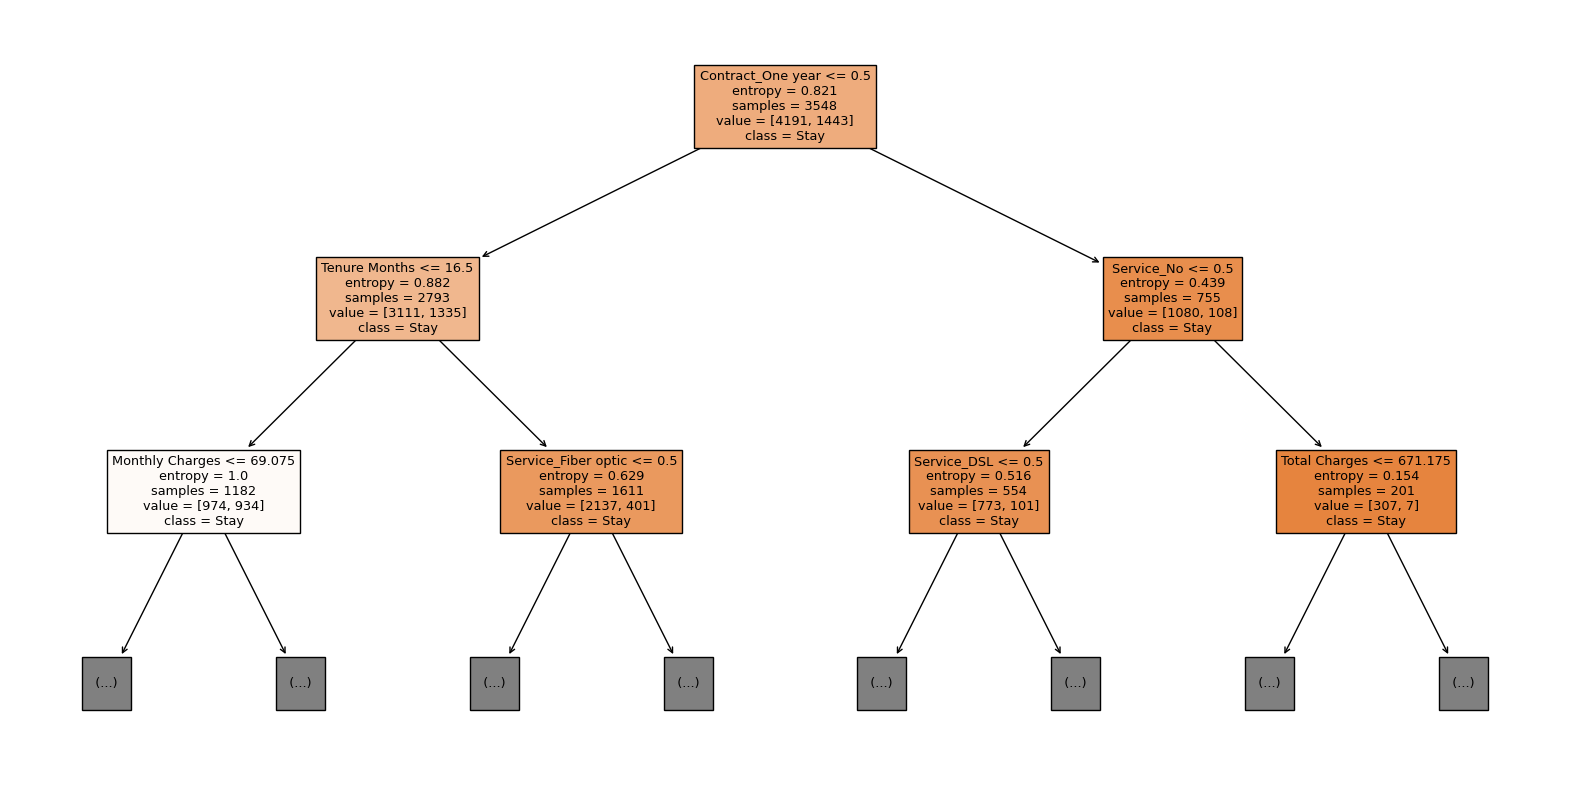

In [44]:
# Visualising an example tree from the decision forest
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf.estimators_[1], max_depth = 2, class_names = ['Stay', 'Churn'], feature_names = Features, filled=True)
plt.show()

### Combination List

Different models have different results which don't fit as expected.  
By taking the average of these two models, we should hopefully reduce this error and improve robustness.

In [45]:
# Creating a list of customers and the predicted likelihood of leaving from the previous two models
# Creating an additional column which takes the average of probabilities from both models
X_log_likely_leave['log_index'] = X_log_likely_leave.index
X_dt_likely_leave['dt_index'] = X_dt_likely_leave.index
concat_df1 = X_log_likely_leave.copy()
concat_df2 = X_dt_likely_leave.copy()
concat_df = concat_df1.set_index('CustomerID').join(concat_df2.set_index('CustomerID'), lsuffix='_log', rsuffix='_dt')
concat_df['y_pred_full'] = (concat_df['y_pred_log'] + concat_df['y_pred_dt'])/2
concat_df.reset_index()
concat_df = concat_df.sort_values('y_pred_full', ascending = False).reset_index()
concat_df.head(500)

,CustomerID,y_pred_log,log_index,y_pred_dt,dt_index,y_pred_full
0,7577-SWIFR,0.777819,18,0.883463,2,0.830641
1,1393-IMKZG,0.815247,5,0.832501,5,0.823874
2,7439-DKZTW,0.687205,88,0.910163,0,0.798684
3,5150-ITWWB,0.772339,22,0.818616,8,0.795477
4,4927-WWOOZ,0.771786,23,0.808435,9,0.790111
...,...,...,...,...,...,...
495,2969-QWUBZ,0.391775,813,0.480999,372,0.436387
496,5630-AHZIL,0.539685,377,0.332426,889,0.436055
497,8120-JDCAM,0.547843,358,0.323958,924,0.435900
498,4828-FAZPK,0.526958,412,0.344627,834,0.435792


In [46]:
# Creating the .csv files to store the created lists

# Full list of customers with probability of churning
concat_df[['CustomerID', 'y_pred_full']].to_csv("CustomerChurnRisk.csv", index=False)

# Top 500 customers most likely to churn
concat_df['CustomerID'].head(500).to_csv("MostLikelyToChurn.csv", index=False)

#### Evaluating Model

In [47]:
# Testing our model on the test data
df_eval = df.copy()

X = df_eval[Features]
y = df_eval['Churn Value']

y_pred = np.where((clf.predict_proba(X_test)[:,1] + lr.predict_proba(X_test)[:,1])/2 >0.5, 1, 0)

get_results(y_test, y_pred)

The confusion matrix for your predictions is:
[[930  79]
 [210 190]] 

The accuracy of your model is: 0.794889992902768
The recall of your model is: 0.475
The precision of your model is: 0.7063197026022305
The F1-score of your model is: 0.5680119581464873


The following code tests our model against just the customers who churned.  
We know for certain that these customers have churned; we don't know for certain if the customers who haven't churned will stay in the future.  
There is likely to be lower variance in this test.

In [48]:
# Testing our model on just those who churned
df_eval = df.copy()
df_eval = df_eval[df_eval['Churn Value'] == 1]

X = df_eval[Features]
y = df_eval['Churn Value']

df_eval['y_pred'] = np.where((clf.predict_proba(X)[:,1] + lr.predict_proba(X)[:,1])/2 >0.5, 1, 0)

get_results(df_eval['Churn Value'], df_eval['y_pred'])

The confusion matrix for your predictions is:
[[  0   0]
 [961 908]] 

The accuracy of your model is: 0.48582129481005887
The recall of your model is: 0.48582129481005887
The precision of your model is: 1.0
The F1-score of your model is: 0.6539431040691394


The precision of this model is 1 and this is expected since all the customers in this test have churned.

Note: This is using the inverse of TP/TN/FP/FN in order to avoid a Dividing by Zero Error